In [1]:

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# continuous_factory_process.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('data/continuous_factory_process.csv', delimiter=',')
df1.dataframeName = 'continuous_factory_process.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 14088 rows and 116 columns


In [3]:
df1.head(30)

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.260000,72.000000,72.30,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.090000,72.000000,72.30,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.290000,72.000000,72.30,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
3,2019-03-06 10:52:36,17.24,23.53,11.54,200,963.0,247,1247.590000,72.000000,72.30,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
4,2019-03-06 10:52:37,17.24,23.53,11.54,200,963.0,247,1252.830000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
5,2019-03-06 10:52:38,17.24,23.53,11.54,200,963.0,247,1262.730000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
6,2019-03-06 10:52:39,17.24,23.53,11.54,200,963.0,247,1306.380000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
7,2019-03-06 10:52:40,17.24,23.53,11.54,200,963.0,247,1296.130000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
8,2019-03-06 10:52:41,17.24,23.53,11.54,200,963.0,247,1251.110000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71
9,2019-03-06 10:52:42,17.24,23.53,11.54,200,963.0,247,1202.160000,72.100000,72.40,...,0.000000e+00,7.93,0.000000e+00,5.65,0.000000e+00,1.85,0.000000e+00,2.89,0.000000e+00,11.71


In [4]:
# deleting the first column

df1 = df1.drop(columns = ['time_stamp'], axis = 1)

# checking the shape of the data after deleting a column
df1.shape

(14088, 115)

In [5]:
#filter the y variables (Output measurement actuals) for prediction 

df2=df1.filter(regex='Stage1', axis=1).filter(regex='Actual', axis=1)


In [6]:
df2

,Stage1.Output.Measurement0.U.Actual,Stage1.Output.Measurement1.U.Actual,Stage1.Output.Measurement2.U.Actual,Stage1.Output.Measurement3.U.Actual,Stage1.Output.Measurement4.U.Actual,Stage1.Output.Measurement5.U.Actual,Stage1.Output.Measurement6.U.Actual,Stage1.Output.Measurement7.U.Actual,Stage1.Output.Measurement8.U.Actual,Stage1.Output.Measurement9.U.Actual,Stage1.Output.Measurement10.U.Actual,Stage1.Output.Measurement11.U.Actual,Stage1.Output.Measurement12.U.Actual,Stage1.Output.Measurement13.U.Actual,Stage1.Output.Measurement14.U.Actual
0,12.720000,0.000000,12.160000,21.970000,0.000000,0.000000e+00,3.820000,2.940000,20.820000,17.300000,8.060000,5.540000,1.660000,2.690000,14.51000
1,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
2,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
3,12.340000,0.000000,0.000000,17.780000,0.000000,0.000000e+00,3.970000,0.000000,19.650000,17.310000,7.550000,5.130000,1.040000,2.700000,0.00000
4,12.290000,0.000000,0.000000,17.830000,31.440000,0.000000e+00,3.870000,0.000000,0.000000,17.300000,7.540000,5.150000,1.150000,2.720000,0.00000
5,12.290000,0.000000,0.000000,17.830000,31.440000,0.000000e+00,3.870000,0.000000,0.000000,17.300000,7.540000,5.150000,1.150000,2.720000,0.00000
6,12.540000,0.000000,11.890000,21.960000,0.000000,0.000000e+00,3.680000,2.920000,20.650000,17.310000,7.970000,5.340000,1.620000,2.650000,14.60000
7,12.540000,0.000000,11.890000,21.960000,0.000000,0.000000e+00,3.680000,2.920000,20.650000,17.310000,7.970000,5.340000,1.620000,2.650000,14.60000
8,12.350000,0.000000,0.000000,18.100000,31.830000,0.000000e+00,1.670000,0.000000,0.000000,17.340000,0.000000,0.000000,0.000000,1.770000,0.00000
9,12.350000,0.000000,0.000000,18.100000,31.830000,0.000000e+00,1.670000,0.000000,0.000000,17.340000,0.000000,0.000000,0.000000,1.770000,0.00000


In [7]:
#create list of columns names for x and y separation
ylist=df2.columns.to_list()


In [8]:
# separating the dependent and independent data
X=df1.drop(ylist, axis=1)
y = df2

In [9]:
#Unsupervised Feature pruning
from sklearn.decomposition import PCA

pca = PCA(n_components=35)
X_pca = pca.fit_transform(X)
X_pca.shape

(14088, 30)

In [10]:
evr = pca.explained_variance_ratio_
evr

array([5.78343733e-01, 3.21924488e-01, 3.28388669e-02, 2.33842659e-02,
       1.09611931e-02, 9.20105083e-03, 5.45329104e-03, 5.34216879e-03,
       2.90319295e-03, 2.01791347e-03, 1.98116939e-03, 1.37207916e-03,
       6.66214754e-04, 6.31049809e-04, 5.01680149e-04, 4.93616306e-04,
       4.22262408e-04, 2.27619950e-04, 2.18089588e-04, 1.90553922e-04,
       1.73026848e-04, 1.43199487e-04, 1.36168336e-04, 1.04872651e-04,
       5.71191648e-05, 4.94878636e-05, 4.73184007e-05, 4.54892278e-05,
       3.44101936e-05, 2.72009384e-05])

In [11]:

df = pd.DataFrame(X_pca, columns=range(1, X_pca.shape[1]+1))
df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-14.735589,2.748301,146.241901,113.776737,16.381528,44.349447,7.309878,6.023080,-8.680305,37.363552,...,9.348124,-8.802668,-0.982970,0.685650,-9.262031,-7.087880,7.006795,-1.810635,-1.991230,-3.161713
1,-14.464585,-2.004045,147.470297,116.774229,-3.064185,40.490427,-0.007920,9.490582,-7.165791,38.020149,...,10.206617,-8.174232,-1.066314,1.119014,-7.546614,-5.413346,6.062093,-1.650826,0.396979,-3.905032
2,-13.140482,-1.878347,144.134226,121.329432,-8.834202,36.990591,5.609892,-3.219638,-7.882916,39.683306,...,6.882566,-7.540050,0.698723,2.030558,-5.284171,-4.926218,4.870753,-1.262145,-1.951896,-4.206034
3,-14.290705,-3.475127,146.183111,116.548832,4.134060,41.850021,8.367912,6.172748,-8.383934,39.411117,...,5.570391,-6.387951,-1.684372,2.066982,-3.732561,-3.852490,3.295169,-0.882583,-1.034200,-4.628803
4,-12.482869,-8.378149,141.791199,119.100916,11.231943,43.247887,-6.303575,1.800851,-9.265952,40.480674,...,2.976796,-5.790645,0.292370,2.490660,-3.002393,-2.634481,2.898581,-0.811431,0.382094,-4.921618
5,-13.009570,-18.436147,145.143084,118.239520,-3.661839,45.064122,-6.019827,10.554730,-4.454578,40.543791,...,8.260521,-5.253230,-1.407172,2.232021,-2.058974,-1.930713,2.287865,-0.507935,-1.830550,-2.560611
6,-9.522467,-61.912360,144.028879,120.518659,-4.418699,42.763316,12.037851,2.789171,-5.712459,40.171244,...,8.468894,-5.900912,-0.827527,2.654673,-0.704356,-1.581608,1.149861,-0.174798,-2.453233,-4.135774
7,-10.910902,-51.817401,145.083462,118.202534,-3.077992,46.364456,12.012344,6.740302,-4.184750,40.954998,...,6.659091,-3.627982,-2.308163,3.204143,1.963578,1.279311,-0.674778,0.181566,0.884875,-5.564958
8,-12.281806,-6.594758,139.691181,120.129774,11.438405,41.805499,6.585839,-5.778843,-11.730425,44.776901,...,-0.647635,-3.316896,1.745063,3.166557,1.278569,0.896957,-0.901559,0.217375,1.726067,-3.570954
9,-17.285755,41.949807,143.461962,116.894064,-3.077068,40.489645,9.008308,1.723758,-9.734250,43.550804,...,5.020016,-4.125077,0.890912,3.390207,2.892856,2.025179,-1.771518,0.521882,0.973112,-5.144556


In [12]:
# splitting them into train test and split each 15 

from sklearn.model_selection import train_test_split


y_train_list=[]
y_test_list=[]

#forward loop creates a list of 15 y (pandas series)
for n in range(len(ylist)):  
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y.iloc[:, n ], test_size = 0.2, random_state = 0)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

    # getting  shapes of data
print("shape of x_train: ", X_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)
print("length of y_train_list: ", len(y_train_list))

shape of x_train:  (11270, 30)
shape of x_test:  (2818, 30)
shape of y_train:  (11270,)
shape of y_test:  (2818,)
length of y_train_list:  15


In [13]:
# standardization of x variables

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating the Model

In [25]:
#Creating the Model

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

model = XGBClassifier(nthread=10, max_depth=12,n_estimators= 150) #nthreads allows more core usage

model_list=[]
ypred_list=[]

#run time without nthread = 8:29
#run time with nthread = 2:02
#run time with nthread and dimensional reduction 1:30
#run time for entire 15 variables 23:21
#ymodel fits
for n in range(len(ylist)):
    model.fit(X_train, y_train_list[n])
    y_pred = model.predict(X_test)
    #add to list
    model_list.append(model)
    ypred_list.append(y_pred)

In [26]:
y_test_list[14]

154      15.58
5831     15.74
3848      0.00
33       15.43
5210     15.78
1746     15.76
5502     15.74
10347    15.00
10948    15.10
10132    15.12
12905     0.00
9296     14.98
11744     0.00
7038      0.00
424       0.00
13651     0.00
467      14.39
5244     15.79
3872      0.00
14082     0.00
10286    15.12
675      14.58
1292     14.41
5561     15.72
12035     0.00
7439     15.78
174      15.63
5941     15.72
4066      0.00
7911      0.00
         ...  
2263     14.89
5702     15.75
382      14.30
12189    15.28
247      15.51
11754    15.12
4688     15.75
7747     15.86
9032      0.00
6877     15.72
2054     15.78
14033     0.00
13819     0.00
4324      0.00
799      14.63
6193      0.00
7154     15.64
180      15.77
2206     15.18
10084    15.06
6774     15.82
4070      0.00
8334     15.79
8436     15.80
1218     14.51
10431    14.97
9342     15.02
7158      0.00
9495     15.02
6971     15.87
Name: Stage1.Output.Measurement14.U.Actual, Length: 2818, dtype: float64

In [27]:
ypred_list[14]

array([15.63, 15.79,  0.  , ...,  0.  ,  0.  ,  0.  ])

In [28]:
from sklearn.metrics import mean_squared_error
#Finding the RMSE and chi2 score
RMSE_list=[]

for n in range(len(ylist)):
    MSE = mean_squared_error(y_test_list[n], ypred_list[n])
    RMSE=np.sqrt(MSE)
    RMSE_list.append(RMSE)

In [29]:
RMSE_list

[0.5152925782892123,
 3.19876754212492,
 0.7833676416847576,
 1.5781392217687946,
 4.12692472960727,
 0.5931771992893123,
 1.1068625554535199,
 0.5218480610958406,
 2.8089890778407334,
 2.7556060545389984,
 1.238451832813913,
 0.7909792854077381,
 0.49336515878881754,
 0.6049876407216329,
 8.403829073895924]

In [23]:
mean_squared_error(y_test_list[14], ypred_list[14])

30.74510252300571

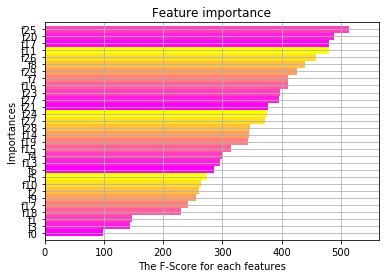

In [24]:
#Significance testing
# Bar plot the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model_list[14], height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (22, 22)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

In [ ]:
#Prediction horizon
#first we try to create a prediction horizon for X

from itertools import product
# Create "grid" with columns
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = []
for block_num in sales['date_block_num'].unique():
    cur_shops = sales.loc[sales['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = sales.loc[sales['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)
grid.head()

In [ ]:
sales_m = sales.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day': 'sum','item_price': np.mean}).reset_index()

# Merging sales numbers with the grid dataframe
sales_m = pd.merge(grid,sales_m,on=['date_block_num','shop_id','item_id'],how='left').fillna(0)

# adding the category id too from the items table.
sales_m = pd.merge(sales_m,items,on=['item_id'],how='left')

In [74]:
# Predicting the test set results



array([ 1.54627500e+01,  1.55345000e+01, -4.25239425e-47, ...,
        6.48001775e+00,  1.10475500e+01,  7.79621007e+00])

In [ ]:
#Scoring Predictions